In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
df = pd.read_csv('kyphosis.csv')

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


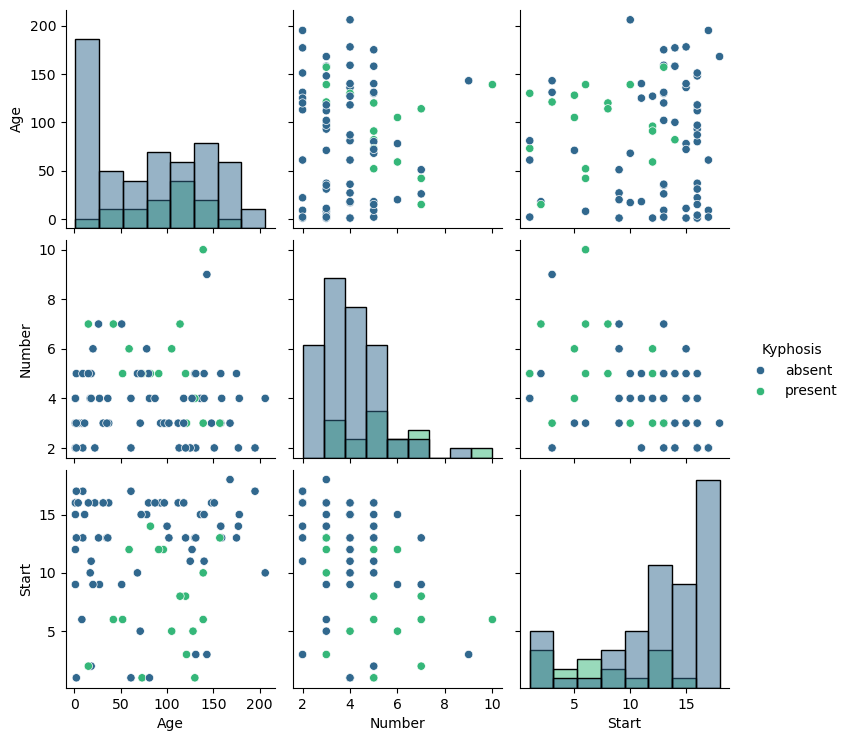

In [15]:
sns.pairplot(df,hue='Kyphosis',diag_kind='hist',palette='viridis')

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
predictions = dtree.predict(x_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



[[12  5]
 [ 6  2]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
pred = rfc.predict(x_test)

In [43]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



[[17  0]
 [ 6  2]]


In [47]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64